# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Syifa Azzahra Susilo
- **Email:** syifaazzahrasusilo@mail.ugm.ac.id
- **ID Dicoding:** MC008D5X2087

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?
- Pertanyaan 2: Apakah ada perbedaan pola peminjaman antara hari kerja dan akhir pekan?
- Pertanyaan 3: Kapan waktu dengan permintaan tertinggi dan terendah untuk peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
bike_day = pd.read_csv("day.csv")
bike_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
bike_hour = pd.read_csv("hour.csv")
bike_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset berisi data peminjaman sepeda yang dicatat per hari (`bike_day`) dan per jam (`bike_hour`).
- Variabel cuaca (`weathersit`, `temp`, `atemp`, `hum`, `windspeed`) berpotensi mempengaruhi jumlah peminjaman, menarik untuk dianalisis lebih lanjut.
- Terdapat informasi mengenai waktu, seperti musim (`season`), bulan (`mnth`), hari dalam seminggu (`weekday`), dan jam (`hr`) yang memungkinkan analisis pola penggunaan sepeda dalam berbagai kondisi.
- Perbedaan antara hari kerja (`workingday`) dan hari libur (`holiday`) dapat membantu memahami kapan sepeda lebih sering digunakan.
- Analisis lanjutan dapat dilakukan untuk melihat pola peminjaman berdasarkan waktu, cuaca, dan kategori pengguna.

### Assessing Data

#### Menilai tabel `bike_day`

In [5]:
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
bike_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
print("Jumlah duplikasi: ", bike_day.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
bike_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `bike_hour`

In [9]:
bike_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
bike_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
print("Jumlah duplikasi: ", bike_hour.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
bike_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak ada missing values dan data duplikat, sehingga dataset dalam kondisi baik untuk analisis lebih lanjut.
- Variabel `dteday` memiliki tipe data string, yang seharusnya diubah menjadi tipe datetime untuk analisis waktu.
- Varibael `season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, dan `weathersit` bertipe numerik, yang seharusnya diubah menjadi tipe kategori agar lebih mudah dianalisis.
- Beberapa variabel cuaca (`temp`, `atemp`, `hum`, `windspeed`) memiliki nilai minimum yang sangat rendah, termasuk `hum` (kelembaban) yang nilai  minimumnya bernilai 0, hal ini mungkin merupakan anomali atau error data.
- Nilai maksimum kecepatan angin (`windspeed`) hanya sekitar 0.5, yang cukup kecil jika satuannya dalam skala 0-1. Hal ini mungkin merupakan kesalahan dalam pengukuran.

### Cleaning Data

**1. Menghapus kolom yang tidak relevan** <br>

hal ini dilakukan karena `instant` adalah indeks, sedangkan `casual` dan `registered` sudah tercakup dalam `cnt`

In [13]:
# Bike_day
bike_daynew = ['instant', 'casual', 'registered']
bike_day.drop(columns=bike_daynew, inplace=True)

In [14]:
# Bike_hour
bike_hournew = ['instant', 'casual', 'registered']
bike_hour.drop(columns=bike_hournew, inplace=True)

**2. Mengubah variabel `dteday` menjadi tipe datetime**

`Bike_day`

In [15]:
bike_day['dteday'] = pd.to_datetime(bike_day['dteday'])

`Bike_hour`

In [16]:
bike_hour['dteday'] = pd.to_datetime(bike_hour['dteday'])

**3. Mengubah tipe data untuk variabel yang seharusnya kategori**

`Bike_day`

In [17]:
categorical = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical:
    bike_day[col] = bike_day[col].astype('category')

bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   yr          731 non-null    category      
 3   mnth        731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  cnt         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(4), int64(1)
memory usage: 40.8 KB


`Bike_hour`

In [18]:
categorical2 = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical2:
    bike_hour[col] = bike_hour[col].astype('category')

bike_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   yr          17379 non-null  category      
 3   mnth        17379 non-null  category      
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  category      
 6   weekday     17379 non-null  category      
 7   workingday  17379 non-null  category      
 8   weathersit  17379 non-null  category      
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  cnt         17379 non-null  int64         
dtypes: category(7), datetime64[ns](1), float64(4), int64(2)
memory usage: 1.0 MB


**4. Membersihkan beberapa variabel cuaca (`temp`, `atemp`, `hum`, `windspeed`)**

`bike_day`

             temp       atemp         hum   windspeed
count  731.000000  731.000000  731.000000  731.000000
mean     0.495385    0.474354    0.627894    0.190486
std      0.183051    0.162961    0.142429    0.077498
min      0.059130    0.079070    0.000000    0.022392
25%      0.337083    0.337842    0.520000    0.134950
50%      0.498333    0.486733    0.626667    0.180975
75%      0.655417    0.608602    0.730209    0.233214
max      0.861667    0.840896    0.972500    0.507463


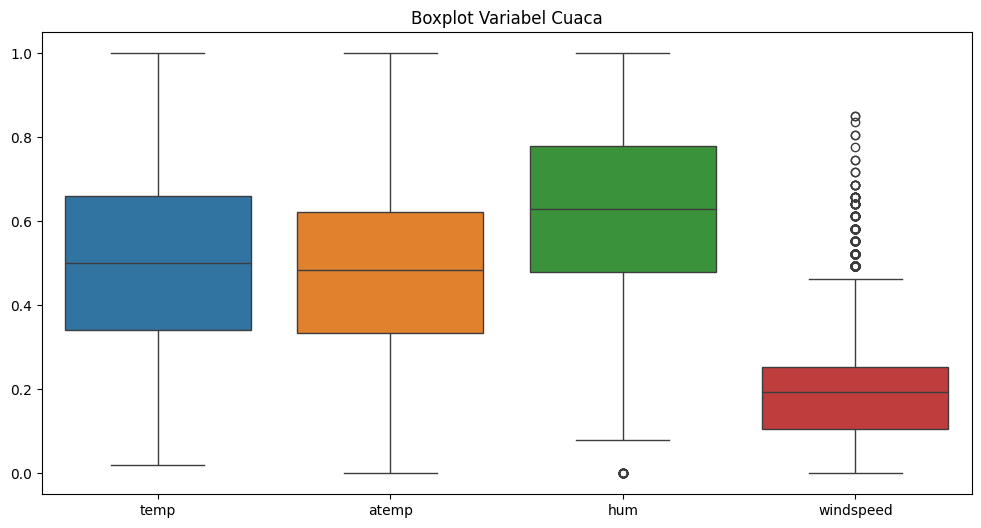

In [19]:
# Mengecek distribusi variabel cuaca
weather = ['temp', 'atemp', 'hum', 'windspeed']
print(bike_day[weather].describe())

# Boxplot untuk mendeteksi outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=bike_hour[weather])
plt.title("Boxplot Variabel Cuaca")
plt.show()

In [20]:
# Mengecek jumlah nilai 0 masing-masing variabel cuaca
zero = (bike_day[weather] == 0).sum()
print("Jumlah nilai nol di tiap variabel cuaca:\n", zero)

Jumlah nilai nol di tiap variabel cuaca:
 temp         0
atemp        0
hum          1
windspeed    0
dtype: int64


In [21]:
# Mengganti nilai 0 dengan median untuk variabel 'hum'
bike_day['hum'] = bike_day['hum'].replace(0, bike_day['hum'].median())

             temp       atemp         hum   windspeed
count  731.000000  731.000000  731.000000  731.000000
mean     0.495385    0.474354    0.628751    0.190486
std      0.183051    0.162961    0.140518    0.077498
min      0.059130    0.079070    0.187917    0.022392
25%      0.337083    0.337842    0.521041    0.134950
50%      0.498333    0.486733    0.626667    0.180975
75%      0.655417    0.608602    0.730209    0.233214
max      0.861667    0.840896    0.972500    0.507463


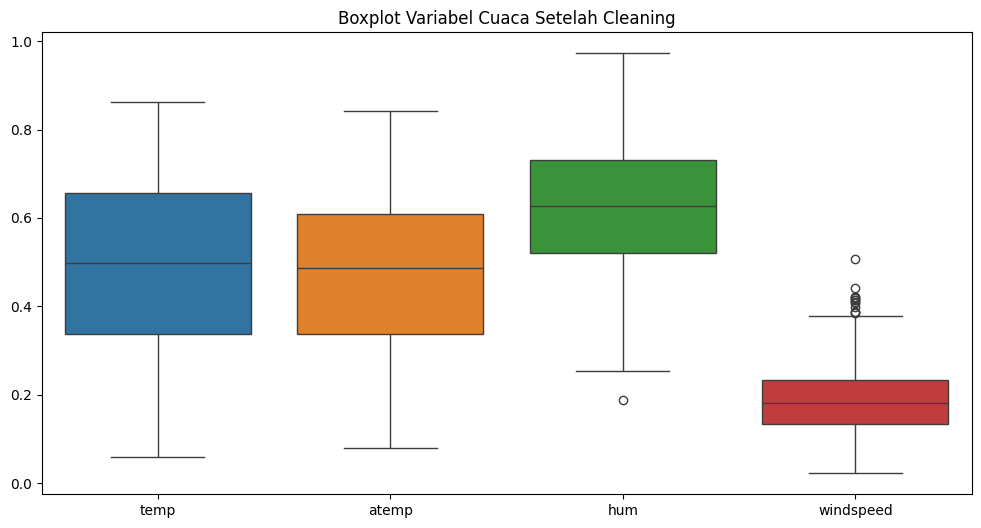

In [22]:
# Mengecek statistik deskriptif setelah cleaning data
print(bike_day[weather].describe())

# Visualisasi Boxplot ulang
plt.figure(figsize=(12, 6))
sns.boxplot(data=bike_day[weather])
plt.title("Boxplot Variabel Cuaca Setelah Cleaning")
plt.show()


**Insight:**
- Dari boxplot di atas, terlihat bahwa variabel `windspeed` masih memiliki beberapa outlier. Hal ini bisa terjadi karena distribusi windspeed cenderung lebih terkonsentrasi di nilai rendah. Namun setelah dilakukan pengecekan outlier pada variabel `windspeed` terjadi secara alami dan bukan error, sehingga outlier ini tidak harus dihapus

In [23]:
# Mengecek kembali jumlah nilai 0 di masing-masing variabel cuaca
zero = (bike_day[weather] == 0).sum()
print("Jumlah nilai nol di variabel cuaca:\n", zero)

Jumlah nilai nol di variabel cuaca:
 temp         0
atemp        0
hum          0
windspeed    0
dtype: int64


`bike_hour`

               temp         atemp           hum     windspeed
count  17379.000000  17379.000000  17379.000000  17379.000000
mean       0.496987      0.475775      0.627229      0.190098
std        0.192556      0.171850      0.192930      0.122340
min        0.020000      0.000000      0.000000      0.000000
25%        0.340000      0.333300      0.480000      0.104500
50%        0.500000      0.484800      0.630000      0.194000
75%        0.660000      0.621200      0.780000      0.253700
max        1.000000      1.000000      1.000000      0.850700


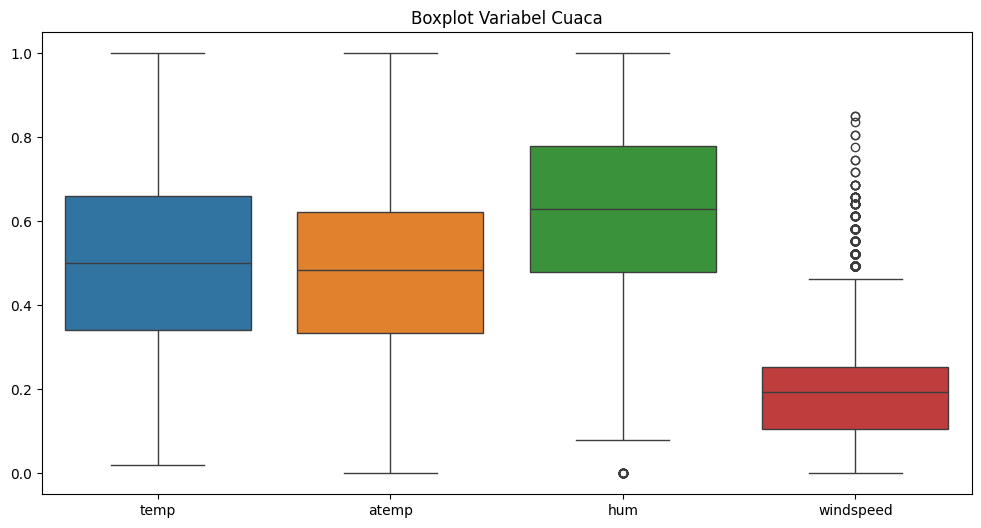

In [24]:
# Mengecek distribusi variabel cuaca
weather = ['temp', 'atemp', 'hum', 'windspeed']
print(bike_hour[weather].describe())

# Boxplot untuk mendeteksi outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=bike_hour[weather])
plt.title("Boxplot Variabel Cuaca")
plt.show()

In [25]:
# Mengecek jumlah nilai 0 masing-masing variabel cuaca
zero = (bike_hour[weather] == 0).sum()
print("Jumlah nilai nol di tiap variabel cuaca:\n", zero)

Jumlah nilai nol di tiap variabel cuaca:
 temp            0
atemp           2
hum            22
windspeed    2180
dtype: int64


In [26]:
# Mengganti nilai 0 dengan median untuk variabel 'hum'
bike_hour['hum'] = bike_hour['hum'].replace(0, bike_hour['hum'].median())

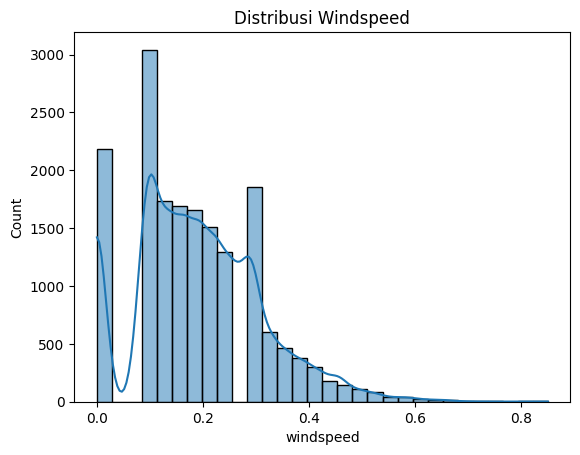

Ada 2180 data dengan windspeed = 0.


In [27]:
# Mengecek distribusi windspeed
sns.histplot(bike_hour['windspeed'], bins=30, kde=True)
plt.title("Distribusi Windspeed")
plt.show()

# Mengecek jumlah nilai windspeed yang bernilai nol
zero_windspeed = (bike_hour['windspeed'] == 0).sum()
print(f"Ada {zero_windspeed} data dengan windspeed = 0.")

In [28]:
# Mengganti nilai 0 dengan median untuk variabel 'windspeed'
bike_hour['windspeed'] = bike_hour['windspeed'].replace(0, bike_hour['windspeed'].median())

               temp         atemp           hum     windspeed
count  17379.000000  17379.000000  17379.000000  17379.000000
mean       0.496987      0.475775      0.628026      0.214433
std        0.192556      0.171850      0.191633      0.099215
min        0.020000      0.000000      0.080000      0.089600
25%        0.340000      0.333300      0.480000      0.134300
50%        0.500000      0.484800      0.630000      0.194000
75%        0.660000      0.621200      0.780000      0.253700
max        1.000000      1.000000      1.000000      0.850700


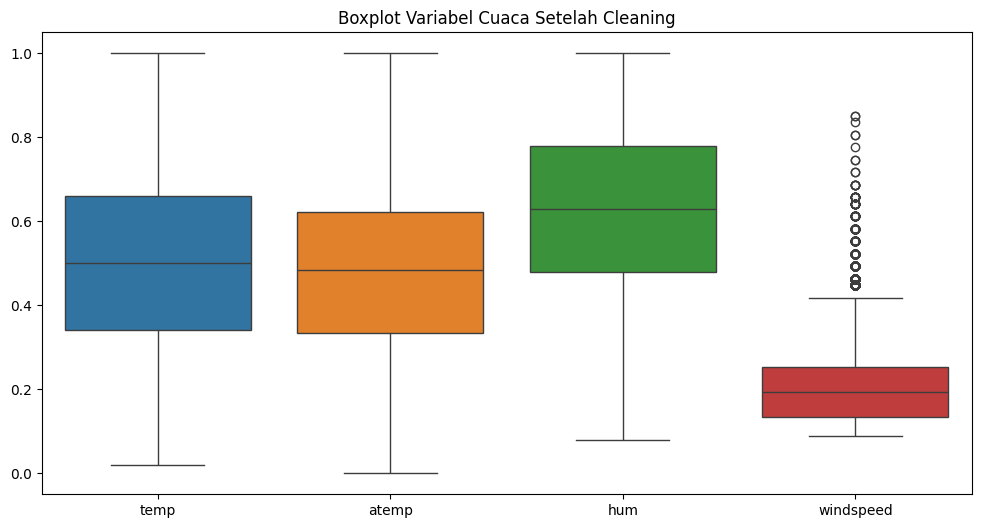

In [29]:
# Mengecek statistik deskriptif setelah cleaning data
print(bike_hour[weather].describe())

# Visualisasi Boxplot ulang
plt.figure(figsize=(12, 6))
sns.boxplot(data=bike_hour[weather])
plt.title("Boxplot Variabel Cuaca Setelah Cleaning")
plt.show()


**Insight:**
- Dari boxplot di atas, terlihat bahwa variabel `windspeed` masih memiliki banyak outlier. Hal ini bisa terjadi karena distribusi windspeed cenderung lebih terkonsentrasi di nilai rendah. Namun setelah dilakukan pengecekan outlier pada variabel `windspeed` terjadi secara alami dan bukan error, sehingga outlier ini tidak harus dihapus

In [30]:
# Mengecek kembali jumlah nilai 0 di masing-masing variabel cuaca
zero = (bike_hour[weather] == 0).sum()
print("Jumlah nilai nol di variabel cuaca:\n", zero)

Jumlah nilai nol di variabel cuaca:
 temp         0
atemp        2
hum          0
windspeed    0
dtype: int64


Dari output di atas, terlihat masih ada 2 nilai nol pada variabel `atemp`, sedangkan variabel lainnya sudah bersih dari nilai nol.

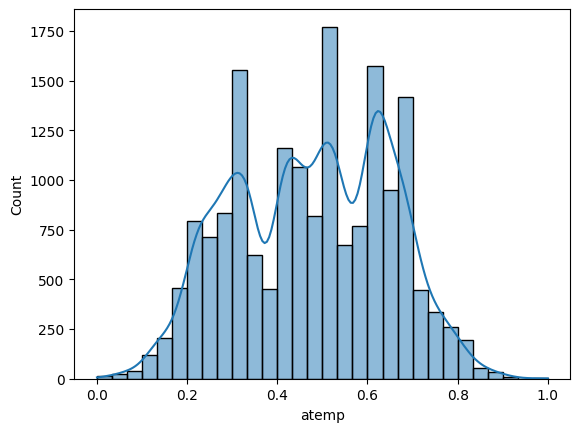

In [31]:
sns.histplot(bike_hour['atemp'], bins=30, kde=True)
plt.show()

Dua nilai nol pada variabel `atemp` kemungkinan anomali, karena suhu yang dirasakan seharusnya berkorelasi dengan suhu aktual (`temp`). Selanjutnya akan dilakukan imputasi dengan median karena lebih tahan terhadap outlier dan menjaga distribusi data.

In [32]:
# Mengganti nilai 0 dengan median untuk variabel 'atemp'
median_atemp = bike_hour['atemp'].median()
bike_hour['atemp'] = bike_hour['atemp'].replace(0, median_atemp)


In [33]:
# Cek kembali jumlah nilai 0 di masing-masing variabel cuaca
zero = (bike_hour[weather] == 0).sum()
print("Jumlah nilai nol di variabel cuaca:\n", zero)

Jumlah nilai nol di variabel cuaca:
 temp         0
atemp        0
hum          0
windspeed    0
dtype: int64


*Dataset setelah tahap cleaning*

In [34]:
display(bike_day.head())
display(bike_hour.head())

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.194,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.194,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.194,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.194,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.194,1


*file setelah data cleaning disimpan* <br>
variabel yang akan digunakan tetap bernama `bike_day` dan `bike_hour`

## Exploratory Data Analysis (EDA)

### Explore `bike_day`

In [35]:
bike_day.sample(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
230,2011-08-19,3,0,8,0,5,1,2,0.685000,0.633221,0.722917,0.139308,4153
454,2012-03-30,2,1,3,0,5,1,2,0.370000,0.375621,0.580833,0.138067,5459
177,2011-06-27,3,0,6,0,1,1,2,0.682500,0.637004,0.658333,0.107588,4708
429,2012-03-05,1,1,3,0,1,1,1,0.243333,0.241171,0.506250,0.228858,3333
667,2012-10-29,4,1,10,0,1,1,3,0.440000,0.439400,0.880000,0.358200,22


In [36]:
bike_day.describe(include="all")

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,731,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4.0,2.0,12.0,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN
top,NaN,3.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
freq,NaN,188.0,366.0,62.0,710.0,105.0,500.0,463.0,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.628751,0.190486,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.187917,0.022392,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.521041,0.134950,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,8714.000000


In [37]:
# Mengelompokkan data berdasarkan musim dan melihat statistik peminjaman sepeda
bike_day.groupby(by="season").agg({
    "cnt": ["max", "min", "mean", "std"]
})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16348\1380402186.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_day.groupby(by="season").agg({


cnt                                
         max   min         mean          std
season                                      
1       7836   431  2604.132597  1399.942119
2       8362   795  4992.331522  1695.977235
3       8714  1115  5644.303191  1459.800381
4       8555    22  4728.162921  1699.615261

- Musim yang memiliki rata-rata peminjaman `tertinggi` adalah `musim gugur` (5644), sementara musim yang memiliki rata-rata peminjaman `terendah` adalah `musim semi` (2604).
- Standar deviasi cukup besar di semua musim, menunjukkan variasi peminjaman yang signifikan.
- Peminjaman `tertinggi` terjadi di `musim gugur` (8714), dan peminjaman `terendah` di `musim dingin` (22).


In [38]:
# Mengelompokkan data berdasarkan hari kerja ('workingday') dan melihat jumlah peminjaman
bike_day.groupby(by="workingday").cnt.sum()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16348\1734850221.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_day.groupby(by="workingday").cnt.sum()


workingday
0    1000269
1    2292410
Name: cnt, dtype: int64

- Peminjaman sepeda lebih banyak saat `hari kerja = 1` dengan total 2.292.410 peminjaman dibandingkan `hari libur = 0` dengan total 1.000.269 peminjaman.

In [39]:
# Mengelompokkan data berdasarkan kondisi cuaca dan melihat distribusi peminjaman
bike_day.groupby(by="weathersit").cnt.agg(["count", "mean", "sum"]).sort_values(by="sum", ascending=False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16348\733175409.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_day.groupby(by="weathersit").cnt.agg(["count", "mean", "sum"]).sort_values(by="sum", ascending=False)


,count,mean,sum
weathersit,,,
1,463,4876.786177,2257952
2,247,4035.862348,996858
3,21,1803.285714,37869


tidak ada `weathersit` dengan kode 4 pada data asli

- Kondisi cuaca terbaik (`weathersit = 1, cerah`) memiliki jumlah peminjaman tertinggi dengan total 2.257.952 peminjaman dan rata-rata harian 4.876 peminjaman.
- Saat cuaca kurang baik (`weathersit = 2, berawan`), peminjaman menurun (total 996.858).
- Kondisi terburuk (`weathersit = 3, hujan ringan`) memiliki peminjaman terendah, hanya 37.869 total peminjaman.

In [40]:
# Menganalisis jumlah peminjaman berdasarkan bulan
bike_day.groupby(by="mnth").cnt.sum().sort_values(ascending=False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16348\1751511409.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_day.groupby(by="mnth").cnt.sum().sort_values(ascending=False)


mnth
8     351194
6     346342
9     345991
7     344948
5     331686
10    322352
4     269094
11    254831
3     228920
12    211036
2     151352
1     134933
Name: cnt, dtype: int64

- Bulan dengan `peminjaman tertinggi` adalah `Agustus` (351.194), `Juni` (346.342), dan `September` (345.991). Sedangkan bulan dengan `peminjaman terendah` adalah bulan `Januari` (134.933).

**Insight:**
- Sepeda lebih banyak dipinjam saat musim gugur dan paling sedikit saat musim semi.
- Saat ari kerja jumlah peminjaman lebih tinggi dibandingkan hari libur, hal ini menunjukkan bahwa sepeda banyak digunakan untuk transportasi rutin.
- Cuaca sangat memengaruhi peminjaman, di mana cuaca cerah meningkatkan jumlah peminjaman, sementara hujan ringan atau kabut membuat jumlah peminjaman turun drastis.
- Bulan-bulan musim panas yaitu Mei–September mengalami peminjaman tertinggi, sementara musim dingin yaitu Desember–Februari mengalami jumlah peminjaman terendah.

### Explore `bike_hour`

In [41]:
bike_hour.sample(5)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
7661,2011-11-20,4,0,11,20,0,0,0,2,0.52,0.5000,0.68,0.1045,113
11804,2012-05-12,2,1,5,1,0,6,0,1,0.50,0.4848,0.48,0.1940,93
2378,2011-04-14,2,0,4,0,0,4,1,1,0.38,0.3939,0.76,0.1343,21
9065,2012-01-18,1,1,1,15,0,3,1,1,0.30,0.2576,0.33,0.5224,130
1014,2011-02-14,1,0,2,22,0,1,1,1,0.34,0.2879,0.46,0.6567,45


In [42]:
bike_hour.describe(include="all")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379,17379.0,17379.0,17379.0,17379.000000,17379.0,17379.0,17379.0,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4.0,2.0,12.0,NaN,2.0,7.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN
top,NaN,3.0,1.0,5.0,NaN,0.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496.0,8734.0,1488.0,NaN,16879.0,2512.0,11865.0,11413.0,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475831,0.628026,0.214433,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.015200,0.080000,0.089600,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.134300,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,977.000000


In [43]:
# Analisis jumlah peminjaman berdasarkan jam dalam sehari
bike_hour.groupby(by="hr").cnt.mean().sort_values(ascending=False)

hr
17    461.452055
18    425.510989
8     359.011004
16    311.983562
19    311.523352
13    253.661180
12    253.315934
15    251.233196
14    240.949246
20    226.030220
9     219.309491
7     212.064649
11    208.143054
10    173.668501
21    172.314560
22    131.335165
23     87.831044
6      76.044138
0      53.898072
1      33.375691
2      22.869930
5      19.889819
3      11.727403
4       6.352941
Name: cnt, dtype: float64

- Jam `17:00` memiliki rata-rata `peminjaman tertinggi` (461), diikuti oleh jam 18:00 (425) dan jam 08:00 (359).
- Peminjaman sepeda lebih tinggi pada jam-jam sibuk (pagi atau sore)
- Peminjaman sepeda  paling sedikit terjadi pada jam 03:00–05:00, kemungkinan karena waktu dini hari saat jarang adanya aktivitas.

In [44]:
# Analisis jumlah peminjaman berdasarkan hari dalam seminggu
bike_hour.groupby(by="weekday").cnt.mean().sort_values(ascending=False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16348\3791445758.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_hour.groupby(by="weekday").cnt.mean().sort_values(ascending=False)


weekday
4    196.436665
5    196.135907
2    191.238891
3    191.130505
6    190.209793
1    183.744655
0    177.468825
Name: cnt, dtype: float64

- Hari Kamis (`weekday = 4`) dan Jumat (`weekday = 5`) memiliki rata-rata peminjaman tertinggi.
- Peminjaman lebih rendah pada hari Minggu (`weekday = 0`), menunjukkan bahwa sepeda lebih banyak digunakan pada hari kerja.

**Insight:**
- Peminjaman sepeda mencapai puncaknya pada jam sibuk, yaitu pagi (08:00) dan sore (17:00–18:00), hal ini memungkinkan sepeda sering digunakan untuk perjalanan kerja.
- Pada hari kerja tren peminjaman lebih tinggi di jam sibuk, sedangkan pada hari libur peminjaman lebih merata dan meningkat pada siang hari (12:00–15:00).
- Hari `Kamis` dan `Jumat` memiliki jumlah peminjaman `tertinggi` dalam seminggu, sedangkan `Minggu` memiliki jumlah `terendah`.
- Dini hari (jam 1:00–5:00) selalu memiliki jumlah peminjaman yang sangat rendah, baik di hari kerja maupun hari libur.

## Visualization & Explanatory Analysis

### Pertanyaan 1:  Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16348\3827619114.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="weathersit", y="cnt", data=bike_day, palette="magma")


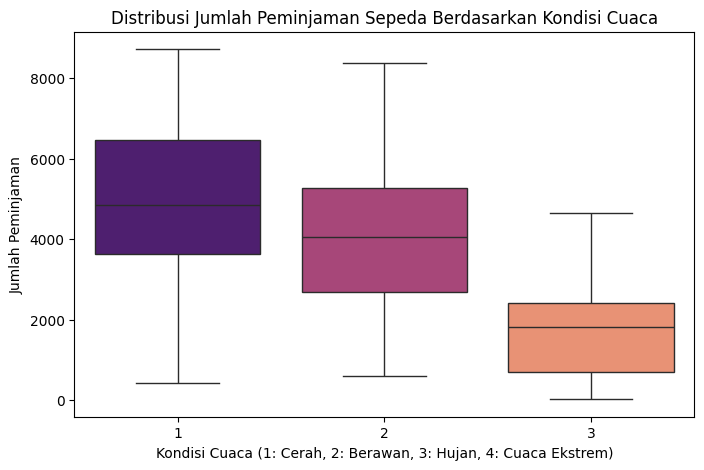

In [45]:
# Boxplot jumlah peminjaman berdasarkan kondisi cuaca
plt.figure(figsize=(8, 5))
sns.boxplot(x="weathersit", y="cnt", data=bike_day, palette="magma")
plt.title("Distribusi Jumlah Peminjaman Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca (1: Cerah, 2: Berawan, 3: Hujan, 4: Cuaca Ekstrem)")
plt.ylabel("Jumlah Peminjaman")
plt.show()

- Cuaca `cerah` memiliki jumlah peminjaman tertinggi, dengan median yang cukup tinggi dan distribusi yang luas.
- Saat cuaca `berawan`, jumlah peminjaman masih cukup tinggi tetapi ebih rendah dibanding saat cuaca cerah.
 -Saat `hujan` jumlah peminjaman turun drastis, hal ini menunjukkan bahwa hujan menjadi faktor utama penurunan peminjaman sepeda.
 -Kategori `cuaca ekstrem` tidak muncul dalam data ini, kemungkinan karena sangat jarang terjadi atau hampir tidak ada peminjaman sepeda saat kondisi ekstrem.

### Pertanyaan 2: Apakah ada perbedaan pola peminjaman antara hari kerja dan akhir pekan?

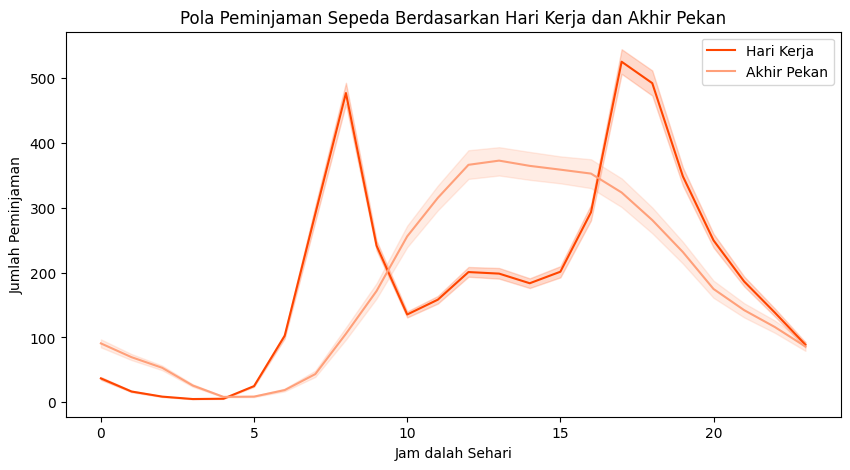

In [46]:
plt.figure(figsize=(10,5))
sns.lineplot(data=bike_hour[bike_hour["workingday"] == 1], x="hr", y="cnt", label="Hari Kerja", color="#FF4500")
sns.lineplot(data=bike_hour[bike_hour["workingday"] == 0], x="hr", y="cnt", label="Akhir Pekan", color="#FFA07A")
plt.title("Pola Peminjaman Sepeda Berdasarkan Hari Kerja dan Akhir Pekan")
plt.xlabel("Jam dalah Sehari")
plt.ylabel("Jumlah Peminjaman")
plt.legend()
plt.show()

Terlihat bahwa pola peminjaman sepeda pada hari kerja dan akhir pekan memiliki perbedaan yang signifikan. Pada `hari kerja`, terdapat dua puncak utama pada pagi hari sekitar pukul 8 dan sore hari sekitar pukul 5 sampai 6, yang kemungkinan besar terjadi aktivitas perjalanan kerja atau sekolah. Sementara itu pada `akhir pekan`, pola peminjaman lebih stabil sepanjang hari dengan lonjakan yang terjadi dari siang sampai sore hari. Hal ini menunjukkan bahwa pada akhir pekan, penggunaan sepeda lebih cenderung untuk aktivitas santai.

### Pertanyaan 3: Kapan waktu dengan permintaan tertinggi dan terendah untuk peminjaman sepeda?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16348\4269915482.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly.index, y=hourly.values, palette="magma")


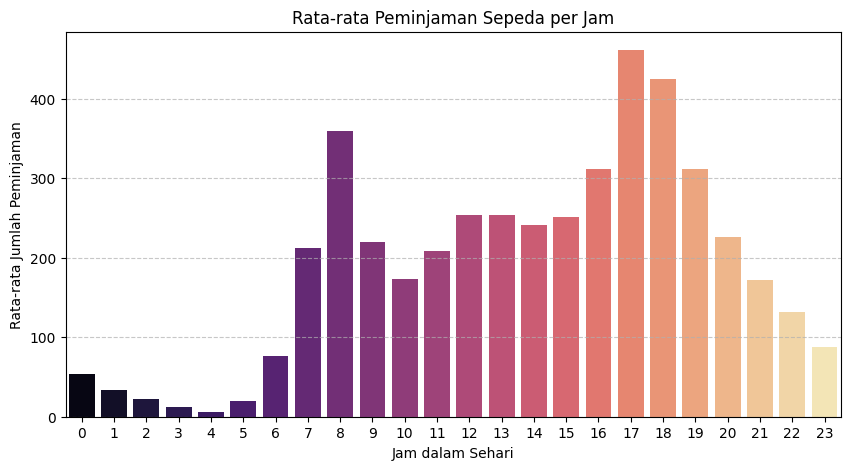

In [47]:
# Mengitung rata-rata peminjaman per jam
hourly = bike_hour.groupby("hr")["cnt"].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=hourly.index, y=hourly.values, palette="magma")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.title("Rata-rata Peminjaman Sepeda per Jam")
plt.xticks(range(24))  # Pastikan sumbu x menampilkan semua jam (0-23)
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Tambahkan grid untuk kejelasan
plt.show()

- Terlihat bahwa `permintaan tertinggi` terjadi pada pukul 5 sampai 6 sore, yang kemungkinan besar terjadi aktivitas setelah jam kerja. Selain itu terdapat peningkatan lain sekitar pukul 7 sampai 9 pagi, yaitu pada saat jam berangkat kerja atau sekolah.
- Sebaliknya, `permintaan terendah` terjadi pada dini hari antara pukul 2 hingga 5 pagi, di mana aktivitas umum masih rendah sehingga sangat sedikit pengguna yang menyewa sepeda.

## Analisis Clustering (Lanjutan)

Pada analisis ini, akan dikelompokkan waktu dalam sehari ke dalam empat kategori utama: <br>
- Pagi: 05:00 - 11:59
- Siang: 12:00 - 16:59
- Sore-Malam: 17:00 - 20:59
- Malam-Dini Hari: 21:00 - 04:59

Tujuan dari analisis ini adalah untuk memahami pola peminjaman sepeda berdasarkan kelompok waktu dalam sehari

time_category
Afternoon    262.244719
Evening      356.201441
Morning      181.520583
Night         65.687968
Name: cnt, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_16348\3991010348.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster.index, y=cluster.values, palette="magma")


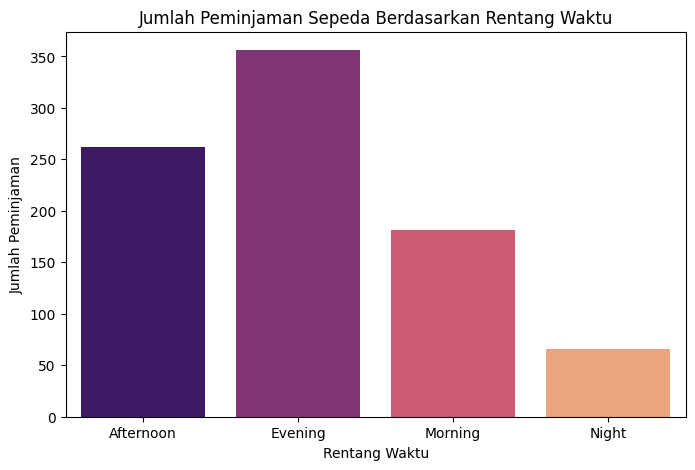

In [48]:
def categorize_hour(hr):
    if 5 <= hr < 12:
        return "Morning"
    elif 12 <= hr < 17:
        return "Afternoon"
    elif 17 <= hr < 21:
        return "Evening"
    else:
        return "Night"

bike_hour["time_category"] = bike_hour["hr"].apply(categorize_hour)

# Menghitung jumlah peminjaman untuk setiap kategori waktu
cluster = bike_hour.groupby("time_category").cnt.mean()
print(cluster)

plt.figure(figsize=(8,5))
sns.barplot(x=cluster.index, y=cluster.values, palette="magma")
plt.title("Jumlah Peminjaman Sepeda Berdasarkan Rentang Waktu")
plt.xlabel("Rentang Waktu")
plt.ylabel("Jumlah Peminjaman")
plt.show()


- Peminjaman `tertinggi` terjadi pada sore hingga malam, kemungkinan karena jam pulang kerja/sekolah.
- Peminjaman pada siang hari juga cukup ramai, memungkinkan jam istirahat dan aktivitas luar ruangan.
- Pada pagi hari jumlah peminjaman sedang, umumnya untuk berangkat kerja atau sekolah.
- dan pada malam hari peminjangan sepeda sedikit.

## Conclusion

#### **Conclusion `pertanyaan 1`**: *Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?* <br>
Cuaca memengaruhi jumlah peminjaman sepeda secara signifikan. Peminjaman paling tinggi terjadi saat cuaca cerah (weathersit = 1), sementara saat hujan atau cuaca ekstrem, jumlah peminjaman menurun drastis. Hal ini menunjukkan bahwa kondisi cuaca yang buruk menjadi hambatan utama dalam penggunaan sepeda.

#### **Conclusion `pertanyaan 2`**: *Apakah ada perbedaan pola peminjaman antara hari kerja dan akhir pekan?* <br>
Pola peminjaman berbeda antara hari kerja dan akhir pekan. Pada hari kerja, peminjaman cenderung meningkat saat pagi (jam berangkat kerja) dan sore (jam pulang kerja). Sedangkan pada akhir pekan, pola lebih merata sepanjang hari, menunjukkan bahwa sepeda lebih sering digunakan untuk rekreasi atau aktivitas santai.

#### **Conclusion `pertanyaan 3`**: *Kapan waktu dengan permintaan tertinggi dan terendah untuk peminjaman sepeda?*
Peminjaman sepeda mengalami puncak tertinggi di sore hingga malam hari, sekitar pukul 17:00 - 18:00, kemungkinan karena aktivitas pulang kerja atau sekolah. Sementara itu, peminjaman paling sedikit terjadi di dini hari (02:00 - 05:00), menunjukkan bahwa sepeda jarang digunakan pada waktu tersebut.

#### **Conclusion `Analisis Clustering (lanjutan)`**
Peminjaman sepeda paling tinggi di sore hari, diikuti oleh siang hari dan pagi hari. Peminjaman paling rendah terjadi di malam hari, kemungkinan karena minimnya aktivitas serta faktor keamanan.


In [49]:
 pip freeze requirements.txt

absl-py==2.1.0
altair==5.5.0
annotated-types==0.6.0
asttokens==2.4.1
astunparse==1.6.3
attrs==23.2.0
babel==2.17.0
bayesian-optimization==1.4.3
beautifulsoup4==4.12.3
blinker==1.9.0
cachetools==5.5.2
catboost==1.2.3
certifi==2024.2.2
charset-normalizer==3.3.2
clarabel==0.9.0
click==8.1.7
cloudpickle==3.0.0
cmdstanpy==1.2.3
colorama==0.4.6
comm==0.2.1
contourpy==1.2.0
cvxpy==1.6.0
cycler==0.12.1
dacite==1.8.1
debugpy==1.8.1
decorator==5.1.1
et-xmlfile==1.1.0
executing==2.0.1
fast-ml==3.68
fastdtw==0.3.4
flatbuffers==24.3.25
fonttools==4.49.0
frozendict==2.4.5
future==1.0.0
gast==0.5.4
gitdb==4.0.12
GitPython==3.1.44
google-pasta==0.2.0
graphviz==0.20.3
grpcio==1.64.0
h5py==3.11.0
holidays==0.50
html5lib==1.1
htmlmin==0.1.12
hyperopt==0.2.7
idna==3.6
ImageHash==4.3.1
imageio==2.34.1
imbalanced-learn==0.12.2
importlib_resources==6.4.0
ipykernel==6.29.3
ipython==8.22.2
ipython-autotime==0.3.2
ipython-genutils==0.2.0
ipywidgets==8.1.2
jedi==0.19.1
Jinja2==3.1.3
joblib==1.3.2
jsonschema==4.2